In [2]:
import numpy
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import cv2 as cv
# from keras import backend as bknd
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Activation, Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [3]:
base = 'D:\\Georgian\\ML Frameworks\\archive\\chest_xray'

train = base + '\\train'
test = base + '\\test'
val = base + '\\val'

normal = train + '\\NORMAL'
pneumonia = train + '\\PNEUMONIA'

os.listdir(base)

['chest_xray', 'test', 'train', 'val', '__MACOSX']

NORMAL2-IM-0520-0001.jpeg
Image size :  (1554, 1402, 3)


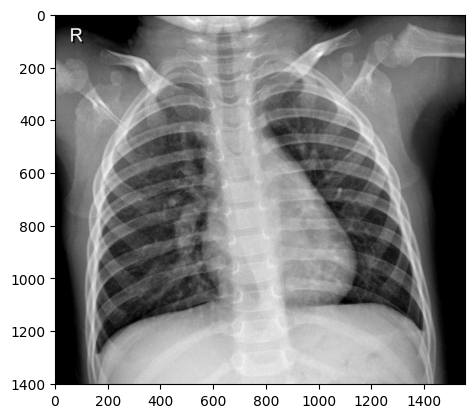

In [4]:
random_img = random.choice(os.listdir(normal))
print(random_img)
img_path = os.path.join(normal, random_img)
img_sample = cv.imread(img_path)
height, width, channels = img_sample.shape
print("Image size : ",(width, height, channels))
plt.figure()
plt.imshow(img_sample)

person1031_bacteria_2963.jpeg
Image size :  (1096, 744, 3)


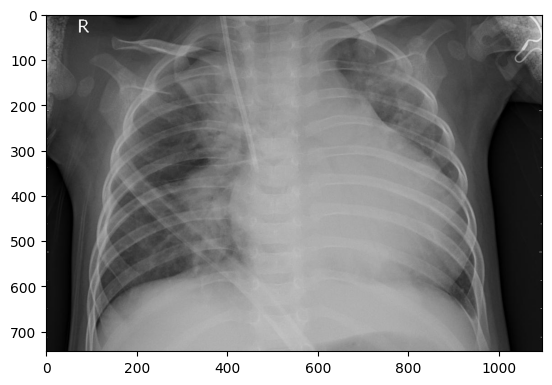

In [5]:
random_img = random.choice(os.listdir(pneumonia))
print(random_img)
img_path = os.path.join(pneumonia, random_img)
img_sample = cv.imread(img_path)
height, width, channels = img_sample.shape
print("Image size : ",(width, height, channels))
plt.figure()
plt.imshow(img_sample)

In [6]:
train_df = []
for img in os.listdir(normal):
    train_df.append((img, 0))

for img in os.listdir(pneumonia):
    train_df.append((img, 1))

train_df = pd.DataFrame(train_df, columns=['images', 'label'],index=None)
train_df

,images,label
0,IM-0115-0001.jpeg,0
1,IM-0117-0001.jpeg,0
2,IM-0119-0001.jpeg,0
3,IM-0122-0001.jpeg,0
4,IM-0125-0001.jpeg,0
...,...,...
5211,person99_virus_183.jpeg,1
5212,person9_bacteria_38.jpeg,1
5213,person9_bacteria_39.jpeg,1
5214,person9_bacteria_40.jpeg,1


In [7]:
shuffled_train_df = train_df.sample(frac=1).reset_index(drop=True)
shuffled_train_df

,images,label
0,person1184_virus_2019.jpeg,1
1,person1178_bacteria_3126.jpeg,1
2,person1709_bacteria_4522.jpeg,1
3,person401_virus_798.jpeg,1
4,person1536_virus_2673.jpeg,1
...,...,...
5211,person1724_bacteria_4549.jpeg,1
5212,person653_bacteria_2545.jpeg,1
5213,person370_bacteria_1687.jpeg,1
5214,person1597_bacteria_4194.jpeg,1


In [46]:
fig = go.Figure(
    data=[go.Bar(x=shuffled_train_df['label'],y=shuffled_train_df['images'], marker_color='red')]
)

fig.update_layout(
    title='Bar Graph Example',
    xaxis_title='Categories',
    yaxis_title='Values',
    template='plotly',
)

fig.show()

In [8]:
shuffled_train_df.shape

(5216, 2)